In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Load the diabetes dataset

In [2]:
diabetes_df = pd.read_csv("dataset_of_diabetes.csv")

diabetes_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## A brief description of the available dataframe columns

* **ID** - a unique identifier for each patient.
* **No_Patient** - a patient number for each patient.
* **Gender** - the gender of the patient (**1** - female (F) and **0** - male (M)).
* **AGE** - the age of the patient (**years**).
* **Urea** - a measure of the concentration of urea in the blood, which is a waste product produced in the liver and excreted in the urine (**mg/dL**).
* **Cr** - a measure of the concentration of creatinine in the blood, which is another waste product produced in the muscles and excreted by the kidneys (**mg/dL**).
* **HBA1C** - a measure of the average blood glucose concentration over the previous 2-3 months, expressed as a percentage of total hemoglobin (**%**).
* **Chol** - a measure of the concentration of cholesterol in the blood, which is a type of fat molecule that is carried in the bloodstream (**mg/dL**).
* **TG** - a measure of the concentration of triglycerides in the blood, which are a type of fat molecule stored in the adipose tissue and used as a source of energy (**mg/dL**).
* **HDL** - a measure of the concentration of high-density lipoprotein in the blood, which is known as the "good" cholesterol as it helps to remove excess cholesterol from the bloodstream (**mg/dL**).
* **LDL** - a measure of the concentration of low-density lipoprotein in the blood, which is known as the "bad" cholesterol as high levels are associated with an increased risk of heart disease (**mg/dL**).
* **VLDL** - a measure of the concentration of very low-density lipoprotein in the blood, which is another type of fat molecule that can contribute to the build-up of cholesterol in the bloodstream (**mg/dL**).
* **BMI** - a measure of body mass index, which is calculated as the ratio of an individual's weight to the square of their height (**kg/m^2**).
* **CLASS** - the patient's diabetes class (**2** - diabetic (Y), **1** - predict-diabetic (P)), and **0** - non-diabetic (N).

## Clean and preprocess dataframe

#### Fix column headings

In [3]:
diabetes_df.rename(
    columns={
        "No_Pation": "No_Patient",
        "HbA1c": "HBA1C",
    },
    inplace=True,
)

diabetes_df.head()

,ID,No_Patient,Gender,AGE,Urea,Cr,HBA1C,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


#### Change the value in the "Gender" column

In [4]:
def gender_map(gender: str) -> int:
    """
    The function returns an integer value of the `Gender`
    column corresponding to the string value.
    """
    return 1 if gender == "F" else 0


diabetes_df["Gender"] = diabetes_df["Gender"].apply(gender_map)

diabetes_df.head()

,ID,No_Patient,Gender,AGE,Urea,Cr,HBA1C,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


#### Change the value in the "CLASS" column

In [5]:
def class_map(diabetes_class: str) -> int:
    """
    The function returns an integer value of the `CLASS`
    column corresponding to the string value.
    """
    return 2 if diabetes_class == "Y" else 1 if diabetes_class == "P" else 0


diabetes_df["CLASS"] = diabetes_df["CLASS"].apply(class_map)

diabetes_df.head()

,ID,No_Patient,Gender,AGE,Urea,Cr,HBA1C,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


#### Check the general information about the dataframe

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1000 non-null   int64  
 1   No_Patient  1000 non-null   int64  
 2   Gender      1000 non-null   int64  
 3   AGE         1000 non-null   int64  
 4   Urea        1000 non-null   float64
 5   Cr          1000 non-null   int64  
 6   HBA1C       1000 non-null   float64
 7   Chol        1000 non-null   float64
 8   TG          1000 non-null   float64
 9   HDL         1000 non-null   float64
 10  LDL         1000 non-null   float64
 11  VLDL        1000 non-null   float64
 12  BMI         1000 non-null   float64
 13  CLASS       1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


#### Check the missing values

In [7]:
diabetes_df.isnull().sum()

ID            0
No_Patient    0
Gender        0
AGE           0
Urea          0
Cr            0
HBA1C         0
Chol          0
TG            0
HDL           0
LDL           0
VLDL          0
BMI           0
CLASS         0
dtype: int64

#### Summarizing dataframe statistics

In [8]:
diabetes_df.describe()

,ID,No_Patient,Gender,AGE,Urea,Cr,HBA1C,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,0.434000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,1.733000
std,240.397673,3.380758e+06,0.495873,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.640407
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,125.750000,2.406375e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,300.500000,3.439550e+04,0.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,550.250000,4.538425e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,2.000000
max,800.000000,7.543566e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


## Exploratory Data Analysis

#### Correlation between some features

In [9]:
features = ["Gender", "AGE", "Urea", "Cr", "HBA1C", "Chol", "TG", "HDL", "LDL", "VLDL", "BMI", "CLASS"]

diabetes_df_relevant = diabetes_df[features]
correlation = diabetes_df_relevant.corr()

correlation

,Gender,AGE,Urea,Cr,HBA1C,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
Gender,1.000000,-0.021829,-0.115637,-0.153736,0.004889,0.063947,-0.051045,0.128956,-0.055465,-0.193535,-0.073508,-0.091797
AGE,-0.021829,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.458299
Urea,-0.115637,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,0.065611
Cr,-0.153736,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.037413
HBA1C,0.004889,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,0.547919
Chol,0.063947,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,0.170115
TG,-0.051045,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,0.185008
HDL,0.128956,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,-0.000193
LDL,-0.055465,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322,0.003454
VLDL,-0.193535,-0.087903,-0.011191,0.009615,0.073462,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133,0.073514


#### General correlation statistics

In [10]:
correlation["CLASS"].sort_values(ascending=False)

CLASS     1.000000
BMI       0.549152
HBA1C     0.547919
AGE       0.458299
TG        0.185008
Chol      0.170115
VLDL      0.073514
Urea      0.065611
Cr        0.037413
LDL       0.003454
HDL      -0.000193
Gender   -0.091797
Name: CLASS, dtype: float64

#### Correlation heatmap

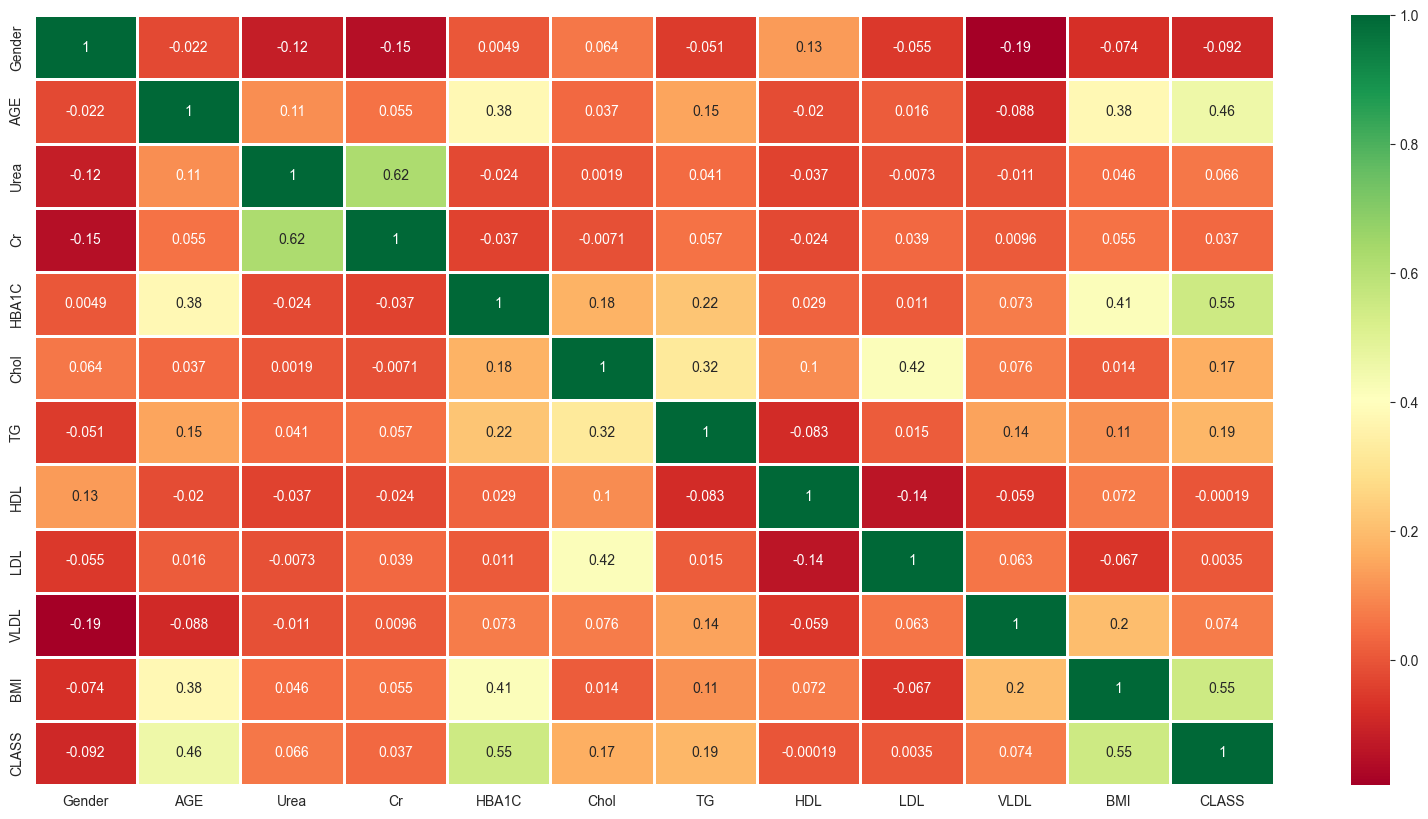

In [11]:
plt.figure(
    figsize=(20, 10)
)

sns.heatmap(
    correlation,
    annot=True,
    cmap="RdYlGn",
    linewidths=1,
)

plt.show()

#### Scatter matrix

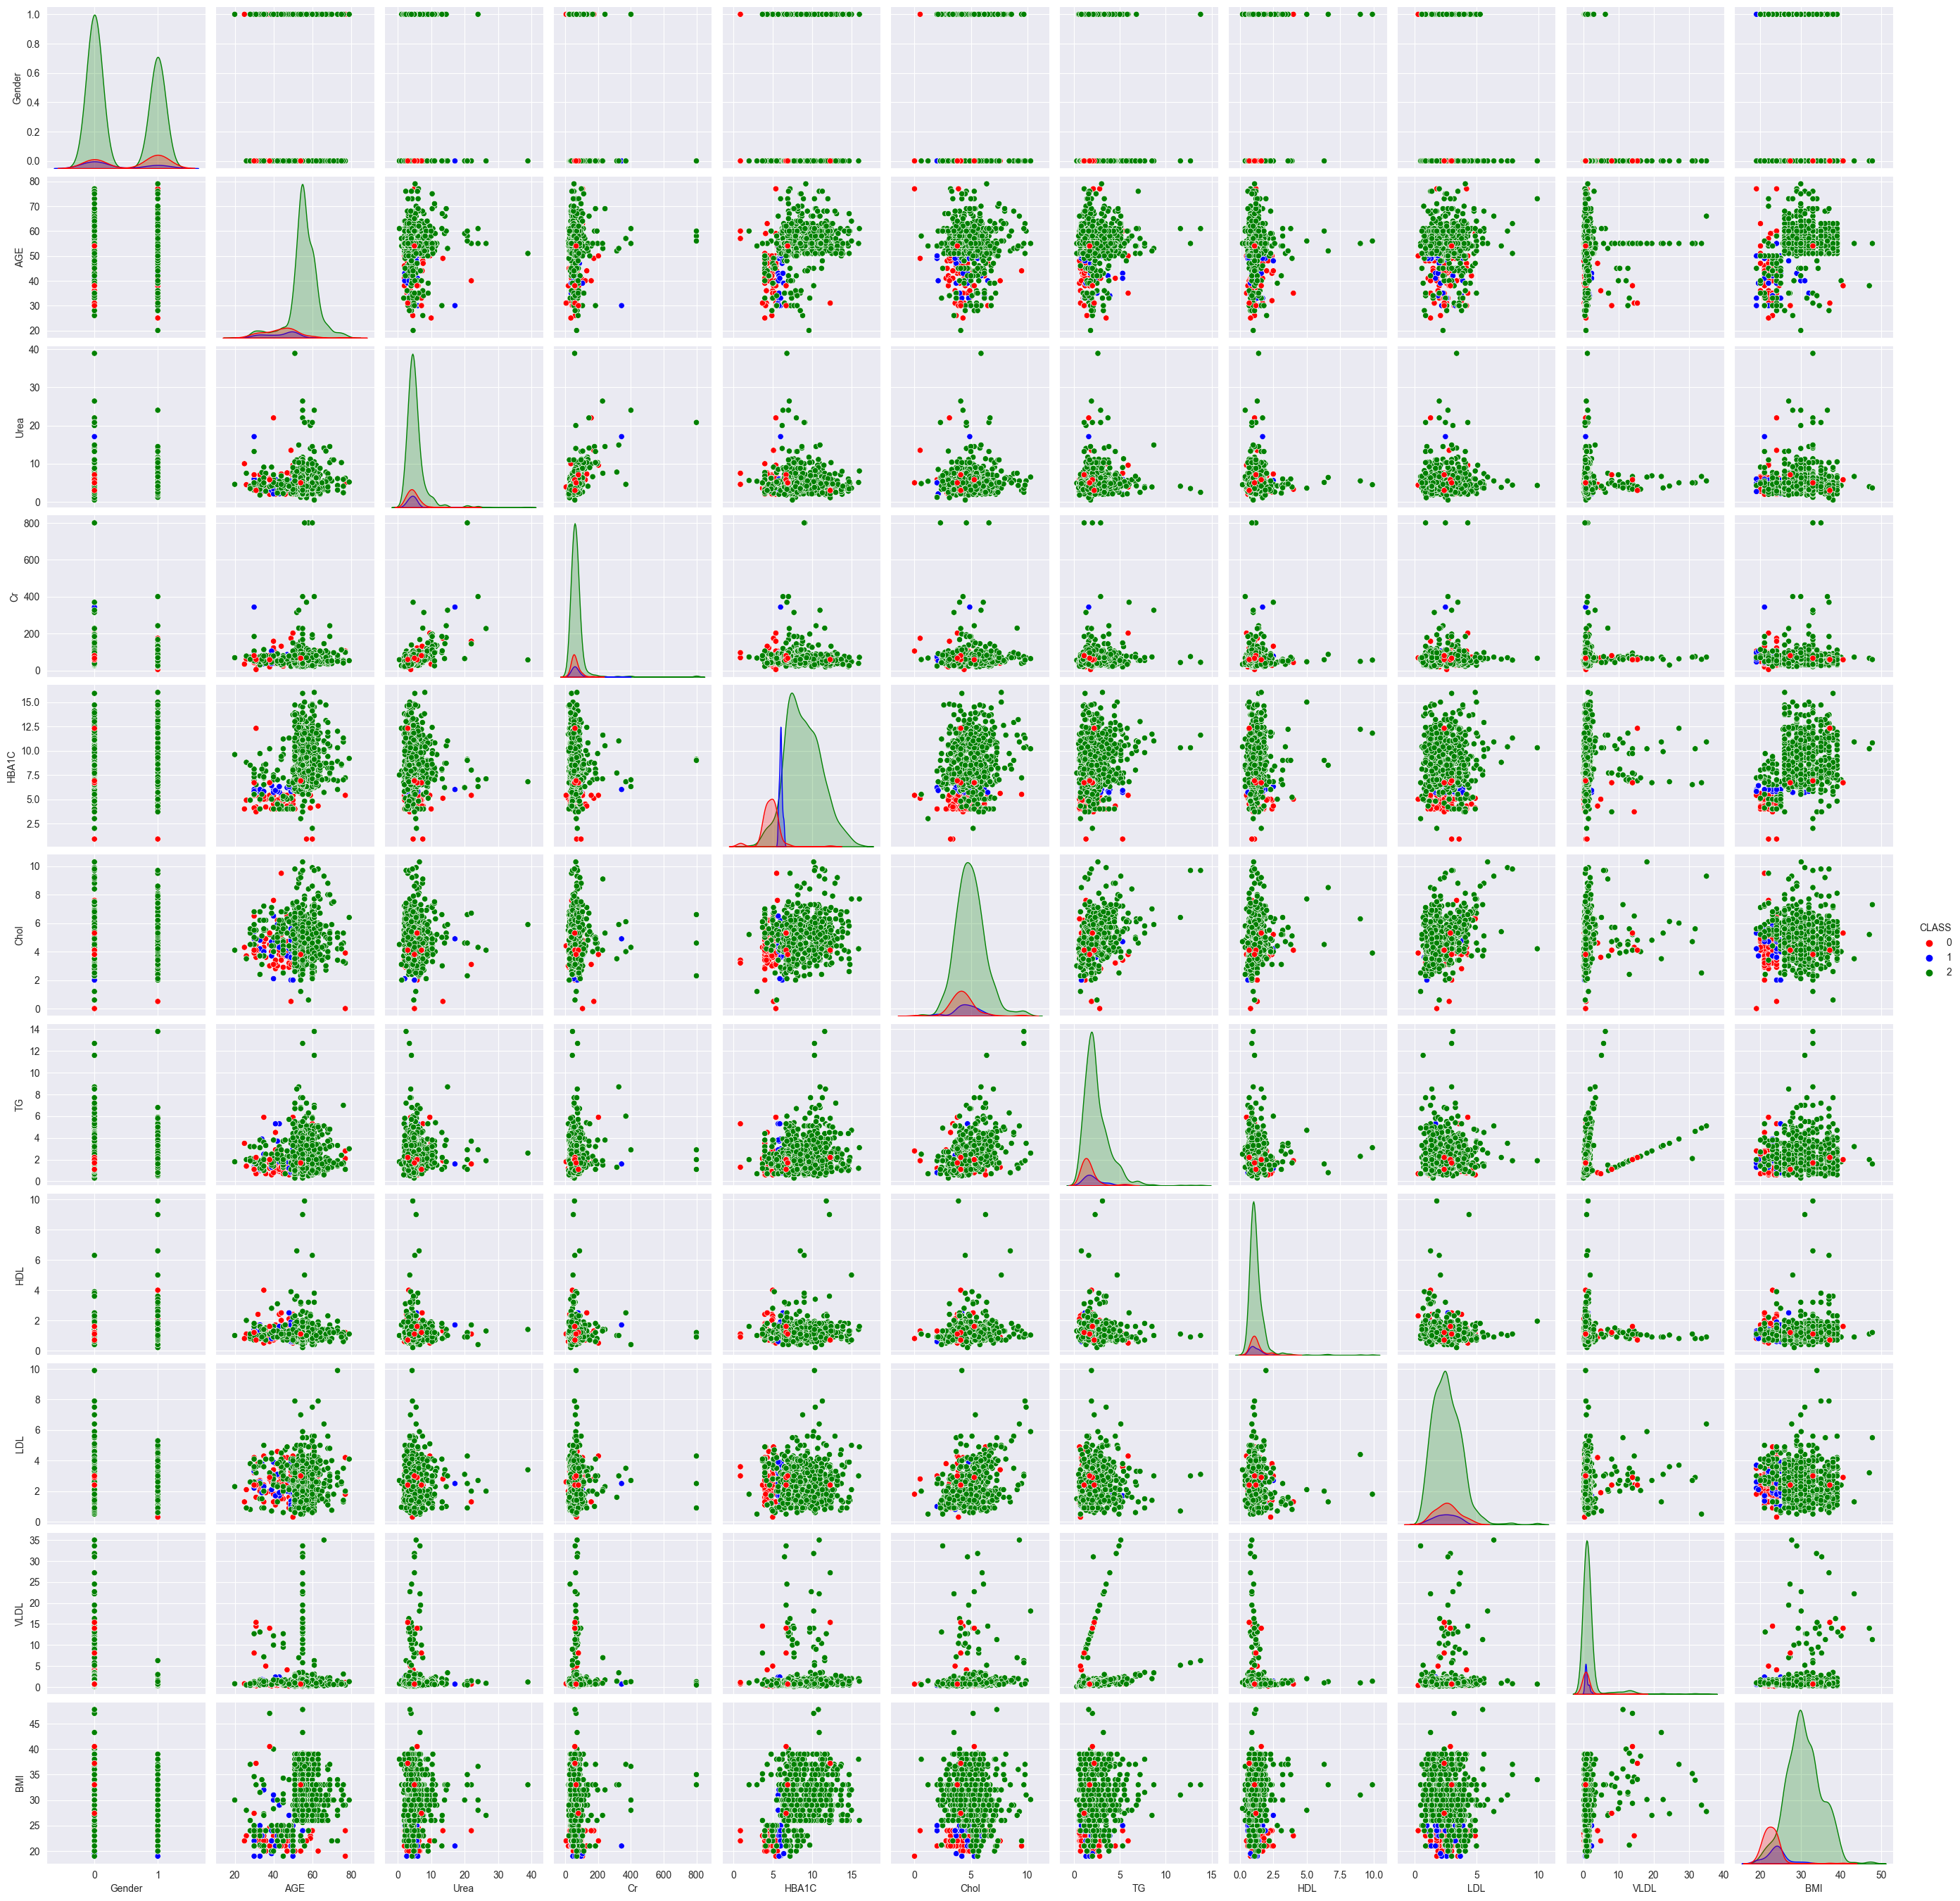

In [12]:
custom_palette = ["red", "blue", "green"]

sns.pairplot(
    diabetes_df_relevant,
    hue="CLASS",
    palette=custom_palette,
)

plt.show()

#### Histogram of all features

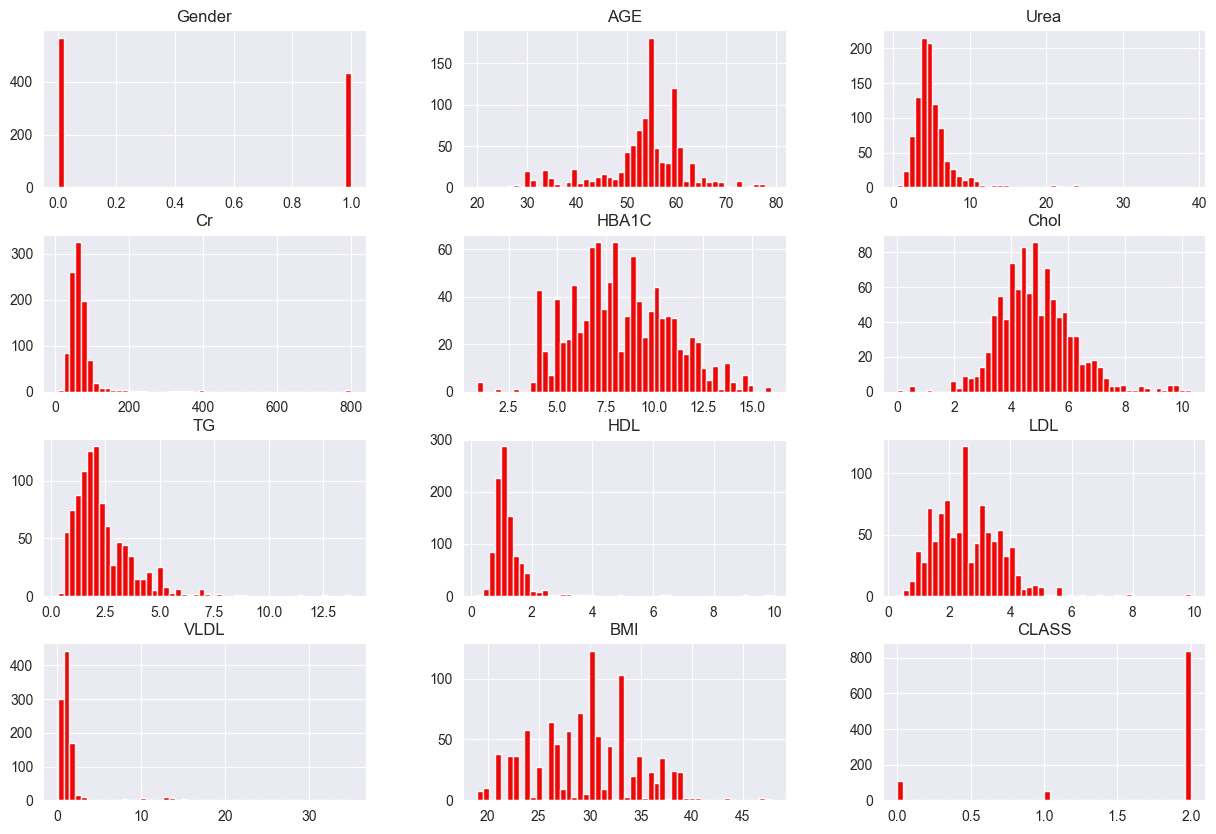

In [13]:
diabetes_df_relevant.hist(
    bins=50,
    figsize=(15, 10),
    color="red",
)

plt.show()

## Prepare data for modeling | Model Training | Model Evaluation (Decision Trees Model)

#### Creating and training Decision Trees Model

In [14]:
X_tree = diabetes_df_relevant.iloc[:, :-1]  # Independent features
y_tree = diabetes_df_relevant.iloc[:, -1]  # Dependent feature

#### Splitting the data

In [15]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(
    X_tree,
    y_tree,
    test_size=0.3,
    random_state=1,
)

#### Modeling using the Gini Impurity

In [16]:
clf_gini = DecisionTreeClassifier(max_depth=3)
clf_gini = clf_gini.fit(X_tree_train, y_tree_train)
y_pred_gini = clf_gini.predict(X_tree_test)

#### Accuracy of the model

In [17]:
gini_accuracy = metrics.accuracy_score(y_tree_test, y_pred_gini)

gini_accuracy

0.95

#### Calculate the confusion matrix

In [18]:
cm_gini = confusion_matrix(y_tree, clf_gini.predict(X_tree))

cm_gini

array([[ 89,   0,  18],
       [  3,  49,   1],
       [  6,   0, 834]], dtype=int64)

#### Draw a plot for the confusion matrix

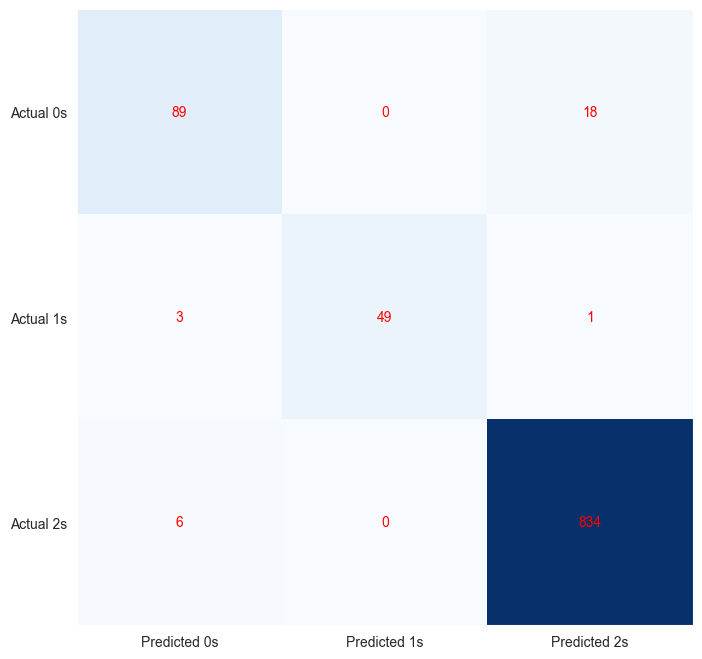

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(
    cm_gini,
    cmap=plt.cm.Blues,
)
ax.grid(False)
ax.xaxis.set(
    ticks=(0, 1, 2),
    ticklabels=("Predicted 0s", "Predicted 1s", "Predicted 2s"),
)
ax.yaxis.set(
    ticks=(0, 1, 2),
    ticklabels=("Actual 0s", "Actual 1s", "Actual 2s"),
)
ax.set_ylim(2.5, -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_gini[i, j], ha="center", va="center", color="red")

plt.show()

#### Calculate the classification

In [20]:
gini_classification = classification_report(y_tree, clf_gini.predict(X_tree))

print(gini_classification)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       107
           1       1.00      0.92      0.96        53
           2       0.98      0.99      0.99       840

    accuracy                           0.97      1000
   macro avg       0.96      0.92      0.94      1000
weighted avg       0.97      0.97      0.97      1000



#### Modeling using the Entropy

In [21]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_entropy = clf_entropy.fit(X_tree_train, y_tree_train)
y_pred_entropy = clf_entropy.predict(X_tree_test)
y_pred_entropy

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2], d

#### Accuracy of the model

In [22]:
entropy_accuracy = metrics.accuracy_score(y_tree_test, y_pred_entropy)

entropy_accuracy

0.9466666666666667

#### Calculate the confusion matrix

In [23]:
cm_entropy = confusion_matrix(y_tree, clf_entropy.predict(X_tree))

cm_entropy

array([[ 90,   0,  17],
       [  0,  51,   2],
       [ 16,   0, 824]], dtype=int64)

#### Draw a plot for the confusion matrix

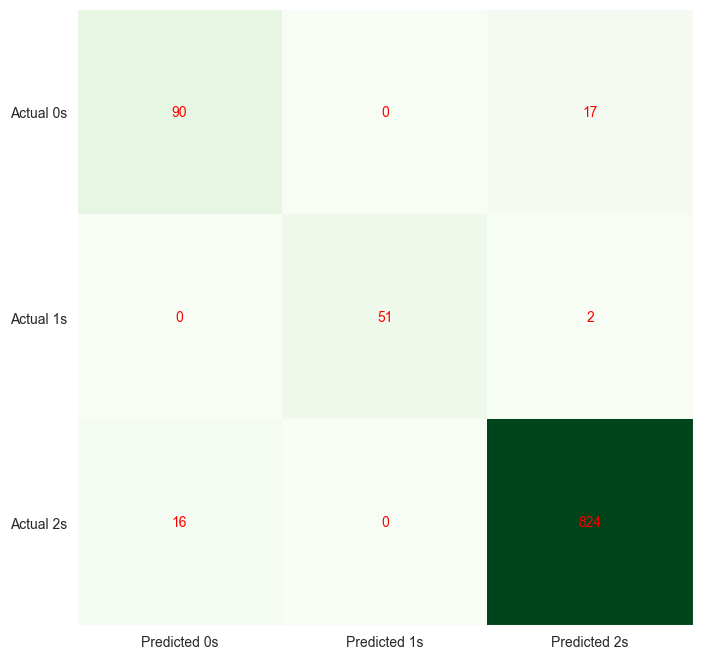

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(
    cm_entropy,
    cmap=plt.cm.Greens,
)
ax.grid(False)
ax.xaxis.set(
    ticks=(0, 1, 2),
    ticklabels=("Predicted 0s", "Predicted 1s", "Predicted 2s"),
)
ax.yaxis.set(
    ticks=(0, 1, 2),
    ticklabels=("Actual 0s", "Actual 1s", "Actual 2s"),
)
ax.set_ylim(2.5, -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_entropy[i, j], ha="center", va="center", color="red")

plt.show()

#### Calculate the classification

In [25]:
entropy_classification = classification_report(y_tree, clf_entropy.predict(X_tree))

print(entropy_classification)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       1.00      0.96      0.98        53
           2       0.98      0.98      0.98       840

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000



## Prepare data for modeling | Model Training | Model Evaluation (Random Forest Model)

#### Creating and training Random Forest Model

In [26]:
X_random = diabetes_df_relevant.iloc[:, :-1]  # Independent features
y_random = diabetes_df_relevant.iloc[:, -1]  # Dependent feature

#### Splitting the data

In [27]:
X_random_train, X_random_test, y_random_train, y_random_test = train_test_split(
    X_random,
    y_random,
    test_size=0.3,
    random_state=1,
)

#### Modeling

In [28]:
clf_random = RandomForestClassifier(n_estimators=15, max_depth=3)
clf_random = clf_random.fit(X_random_train, y_random_train)
y_pred_random = clf_random.predict(X_random_test)

#### Accuracy of the model

In [29]:
random_accuracy = metrics.accuracy_score(y_random_test, y_pred_random)

random_accuracy

0.9433333333333334

#### Calculate the confusion matrix

In [30]:
cm_random = confusion_matrix(y_random, clf_random.predict(X_random))

cm_random

array([[102,   0,   5],
       [ 19,  18,  16],
       [  7,   1, 832]], dtype=int64)

#### Draw a plot for the confusion matrix

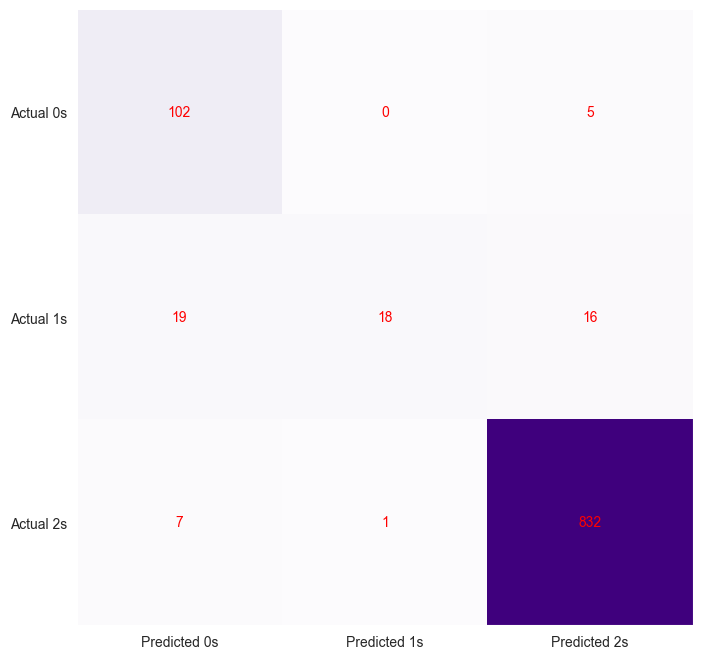

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(
    cm_random,
    cmap=plt.cm.Purples,
)
ax.grid(False)
ax.xaxis.set(
    ticks=(0, 1, 2),
    ticklabels=("Predicted 0s", "Predicted 1s", "Predicted 2s"),
)
ax.yaxis.set(
    ticks=(0, 1, 2),
    ticklabels=("Actual 0s", "Actual 1s", "Actual 2s"),
)
ax.set_ylim(2.5, -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_random[i, j], ha="center", va="center", color="red")

plt.show()

#### Calculate the classification

In [32]:
print(classification_report(y_random, clf_random.predict(X_random)))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       107
           1       0.95      0.34      0.50        53
           2       0.98      0.99      0.98       840

    accuracy                           0.95      1000
   macro avg       0.91      0.76      0.78      1000
weighted avg       0.95      0.95      0.94      1000



## Conclusion

* Best Algorithm is **Decision Trees** (Gini Impurity).
* Decision Trees Accuracy (Gini Impurity): **0.95**.
* Decision Trees Accuracy (Entropy): **0.9466666666666667**.
* Random Forest Accuracy: **0.9433333333333334**.

## Save the model in the pickle file

In [33]:
import pickle

FILENAME = "decision_trees_model.pkl"

# Save the model to a pickle file
with open(FILENAME, "wb") as file:
    pickle.dump(clf_gini, file)